In [28]:
%pylab inline

import pandas as pd
import geopandas as gp
import os

import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [3]:
PWD = os.getenv("PWD")

In [11]:
dem = pd.read_csv(PWD + '/data/Demographic_2014.csv')
dem.drop(dem.index[0], inplace=1)

In [12]:
dem.head(2)

,FIPS,Geographic Identifier,Name of Area,Qualifying Name,State/U.S.-Abbreviation (USPS),Summary Level,Geographic Component,File Identification,Logical Record Number,US,...,Population 35 to 64:,Population 35 to 64: No Health Insurance Coverage,Population 35 to 64: With Health Insurance Coverage,Population 35 to 64: With Health Insurance Coverage: Public Health Coverage,Population 35 to 64: With Health Insurance Coverage: Private Health Insurance,Population 65 or older:,Population 65 or older: No Health Insurance Coverage,Population 65 or older: With Health Insurance Coverage,Population 65 or older: With Health Insurance Coverage: Public Health Coverage,Population 65 or older: With Health Insurance Coverage: Private Health Insurance
1,600601,86000US00601,00601 ZCTA5,00601 ZCTA5,pr,860,0,ACSSF,7371,NaN,...,6893,895,5998,4219,1942,2651,31,2620,2492,554
2,600602,86000US00602,00602 ZCTA5,00602 ZCTA5,pr,860,0,ACSSF,7372,NaN,...,16684,1451,15233,9543,6430,5703,11,5692,5598,996


In [20]:
for x in [i for i in dem.columns if 'Population' in i]:
    print x

Total Population
Total Population.1
Population Density (per sq. mile)
Total Population:
Total Population: Male
Total Population: Female
Total Population:.1
Total Population: Male.1
Total Population: Male: Under 5 Years
Total Population: Male: 5 to 9 Years
Total Population: Male: 10 to 14 Years
Total Population: Male: 15 to 17 Years
Total Population: Male: 18 to 24 Years
Total Population: Male: 25 to 34 Years
Total Population: Male: 35 to 44 Years
Total Population: Male: 45 to 54 Years
Total Population: Male: 55 to 64 Years
Total Population: Male: 65 to 74 Years
Total Population: Male: 75 to 84 Years
Total Population: Male: 85 Years and over
Total Population: Female.1
Total Population: Female: Under 5 Years
Total Population: Female: 5 to 9 Years
Total Population: Female: 10 to 14 Years
Total Population: Female: 15 to 17 Years
Total Population: Female: 18 to 24 Years
Total Population: Female: 25 to 34 Years
Total Population: Female: 35 to 44 Years
Total Population: Female: 45 to 54 Years

In [125]:
def compare(featureSet, partition, ax=None, data=dem):
    '''
    compare clusters of zipcodes using specific feature
    
    featureSet - list of strings, name of the columns in data to operate on
    partition - df, which has two columns with the following names: zip, label
    ax - ax, subplot to populate the plot, optional
    data - df, dataset to retrieve feature from
    
    TODO:
        - plot size
        - legend minimize
        - title
    
    '''
    for feature in featureSet:
        if feature not in data.columns:
            raise InputError('Feature %s not in the dataset' % feature)
    
    if 'zip' not in partition.columns or 'label' not in partition.columns:
        raise InputError("can't see zip in the partition")
        
    nClstrs = len(partition['label'].unique()) # number of clusters
        
    # create ax if there is no passed one (for subplots)

    if not ax:
        
        width = min(nClstrs*2,18)
        fig, ax = plt.subplots(figsize=(width,5))
        
        plt.axis('off');
#         plt.setp(ax.gca().get_legend().get_texts() , fontsize='small');

    

    
    # get only features and zipcode. rename zipcode
    zn = 'ZIP Code Tabulation Area (5-digit)' 
    fset = data[[zn] + featureSet].rename(columns={zn:'zip'}) 
    
    # group and calculate
    d = partition.merge(fset, how='left', on='zip')[['label'] + featureSet]
    d = d.groupby('label').agg(sum)
    x = d.divide(d.sum(1), 0)
    
    
    x.plot(kind='bar', cmap='spectral',ax=ax, stacked=True)
    
    return x



## test

In [126]:
flist = [
    'Total Population: White Alone',
    'Total Population: Black or African American Alone',
    'Total Population: American Indian and Alaska Native Alone',
    'Total Population: Asian Alone',
    'Total Population: Native Hawaiian and Other Pacific Islander Alone',
    'Total Population: Some Other Race Alone',
        ]

p = [{'zip':11225,'label':1},
     {'zip':11226,'label':2}]

partition = pd.DataFrame(p)
partition

,label,zip
0,1,11225
1,2,11226


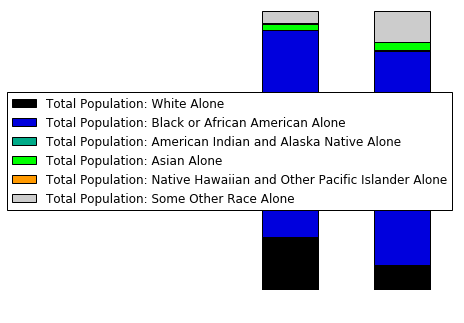

In [127]:
d = compare(flist, partition)